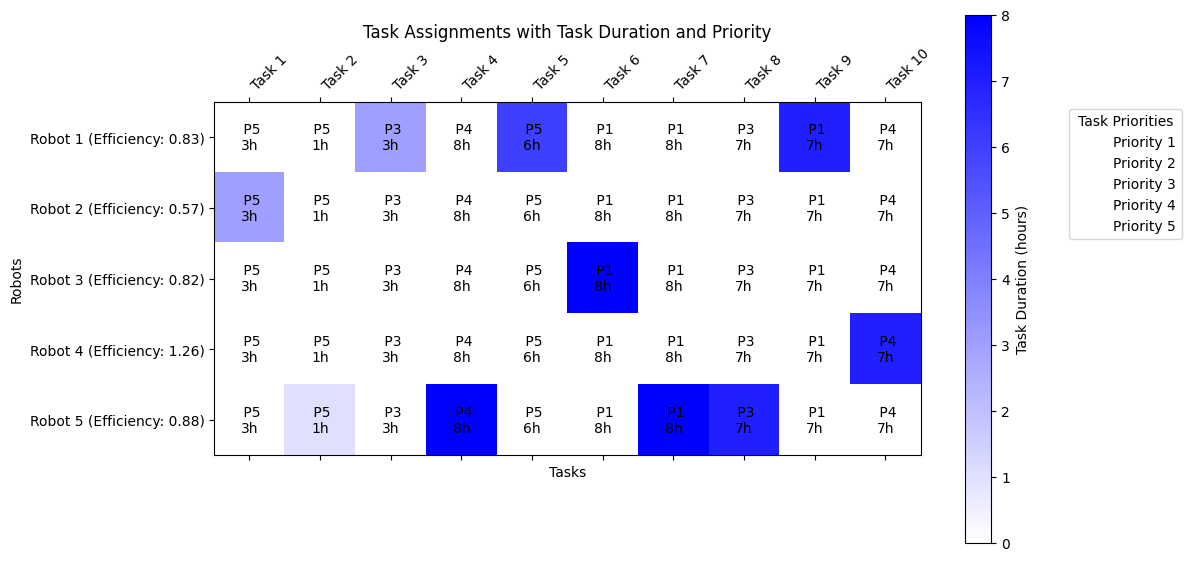

Fitness value of the best solution: 336.45416087073204
Total production time for each robot:  [196.54208321707756, 286.14682131817756, 197.83889390060065, 129.44811123959363, 184.34355184513302]
Workload balance (standard deviation):  50.30733955255447
Best Solution:  [2 0 1 0 1 3 0 0 1 4]
Task Durations: [3 1 3 8 6 8 8 7 7 7]
Task Priorities: [5 5 3 4 5 1 1 3 1 4]
Robot Efficiencies: [0.82933892 0.56963764 0.82390271 1.2591918  0.88421861]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define parameters
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.05
TOURNAMENT_SIZE = 5

def total_production_time(tasks, priorities, efficiencies):
    total_time = 0
    for n in range(len(tasks)):
        total_time += (tasks[n] * priorities[n]) / efficiencies
    return total_time

def workload_balance(times):
    return np.std(times)

def fitness_function(tasks, priorities, efficiencies, robot_count):
    total_times = []
    for r in range(robot_count):
        total_times.append(total_production_time(tasks[r], priorities[r], efficiencies[r]))
    max_time = np.max([np.max(time) for time in total_times])  # Find the maximum time among all robots
    balance = workload_balance(total_times)
    return max_time + balance

def initialize_population(population_size, robot_count, num_tasks):
    population = []
    for _ in range(population_size):
        chromosome = np.random.choice(robot_count, num_tasks)  # Random assignment of tasks to robots
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    crossover_point = np.random.randint(len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutate(chromosome, mutation_rate, robot_count):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.randint(robot_count)
    return chromosome

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(2):  # Select only two parents
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]
        selected_index = tournament_indices[np.argmin(tournament_fitness)]
        selected_parents.append(population[selected_index])
    return selected_parents

def genetic_algorithm(population_size, generations, mutation_rate, tasks, priorities, efficiencies, robot_count, tournament_size):
    num_tasks = len(tasks[0])
    population = initialize_population(population_size, robot_count, num_tasks)
    for _ in range(generations):
        fitness_values = np.array([fitness_function(tasks, priorities, efficiencies, robot_count) for _ in range(population_size)])
        new_population = []
        for _ in range(population_size // 2):
            parents = tournament_selection(population, fitness_values, tournament_size)
            parent1, parent2 = parents
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate, robot_count)
            child2 = mutate(child2, mutation_rate, robot_count)
            new_population.extend([child1, child2])
        population = new_population
    best_chromosome = min(population, key=lambda x: fitness_function(tasks, priorities, efficiencies, robot_count))
    return best_chromosome

def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx - 1, task_idx] = task_durations[task_idx]  # Subtract 1 from robot_idx

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f' P{task_priorities[j]}\n{task_durations[j]}h' , ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    num_tasks = len(task_durations)
    num_robots = len(robot_efficiencies)
    best_solution = genetic_algorithm(POPULATION_SIZE, GENERATIONS, MUTATION_RATE, [task_durations]*num_robots, [task_priorities]*num_robots, [robot_efficiencies]*num_robots, num_robots, TOURNAMENT_SIZE)
    return best_solution

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Calculate fitness value of the best solution
    best_fitness = fitness_function([task_durations] * num_robots, [task_priorities] * num_robots, [robot_efficiencies] * num_robots, num_robots)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)

    # Analyze workload distribution
    total_times = []
    for r in range(num_robots):
        total_times.append(total_production_time(task_durations, task_priorities, robot_efficiencies[r]))
    print("Fitness value of the best solution:", best_fitness)
    print("Total production time for each robot: ", total_times)
    print("Workload balance (standard deviation): ", workload_balance(total_times))
    print("Best Solution: ", best_solution)
    print("Task Durations:", task_durations)
    print("Task Priorities:", task_priorities)
    print("Robot Efficiencies:", robot_efficiencies)
